In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import seaborn as sns

In [6]:
df=pd.read_csv('../data/interim/df_merged.csv',index_col=0)

#Change the type to datetime
df['ISSUE_DATE']=df['ISSUE_DATE'].astype('datetime64')

Aims for this notebook:
* [ ] Conduct EDA without grouping Permit Dataset by year
* [ ]

***
<center><h3>High Level Overview<center><h3>

In [7]:
def preview (df):
    print(f'The dataframe shape is {df.shape}')
    preview_df=pd.DataFrame({'Data Types':df.dtypes,'Total Null Values':df.isna().sum(), 'Null Values Percentage':df.isna().sum()*100/df.shape[0],'Sample Value':df.sample().T.iloc[:,0]})
    return preview_df

In [8]:
preview(df)

The dataframe shape is (702310, 36)


,Data Types,Total Null Values,Null Values Percentage,Sample Value
ID,int64,0,0.0,3290331
PERMIT_TYPE,object,0,0.0,WRECKING/DEMOLITION
REVIEW_TYPE,object,0,0.0,DEMOLITION PERMIT
ISSUE_DATE,datetime64[ns],0,0.0,2022-12-14 00:00:00
PROCESSING_TIME,float64,0,0.0,0.0
WORK_DESCRIPTION,object,0,0.0,EMERGENCY WRECK AND REMOVE A 2 STORY MASONRY R...
BUILDING_FEE_PAID,float64,0,0.0,0.0
ZONING_FEE_PAID,float64,0,0.0,0.0
OTHER_FEE_PAID,float64,0,0.0,0.0
SUBTOTAL_PAID,float64,0,0.0,0.0


In [9]:
df_clean=df.copy()

---
<center><h2> Dependent Variables: Education/Income <center><h2>


* [ ] Visualize yearly change between the y columns
    * [ ] yearly means

---
<center><h4> Median_earnings <center><h4>

In [10]:
#select the names of y columns
y_col_mask=df.loc[:,[bool(re.search(r'^Median',col)) for col in df_clean.columns]].columns
print('Y columns',[i for i in y_col_mask])
df_Y=df_clean[y_col_mask]
print('Distinct years',[i[-4:]for i in df_Y.mean().index[::-1]])

Y columns ['Median_earnings_2010', 'Median_earnings_2011', 'Median_earnings_2012', 'Median_earnings_2013', 'Median_earnings_2014', 'Median_earnings_2015', 'Median_earnings_2016', 'Median_earnings_2017', 'Median_earnings_2018', 'Median_earnings_2019', 'Median_earnings_2020', 'Median_earnings_2021']
Distinct years ['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']


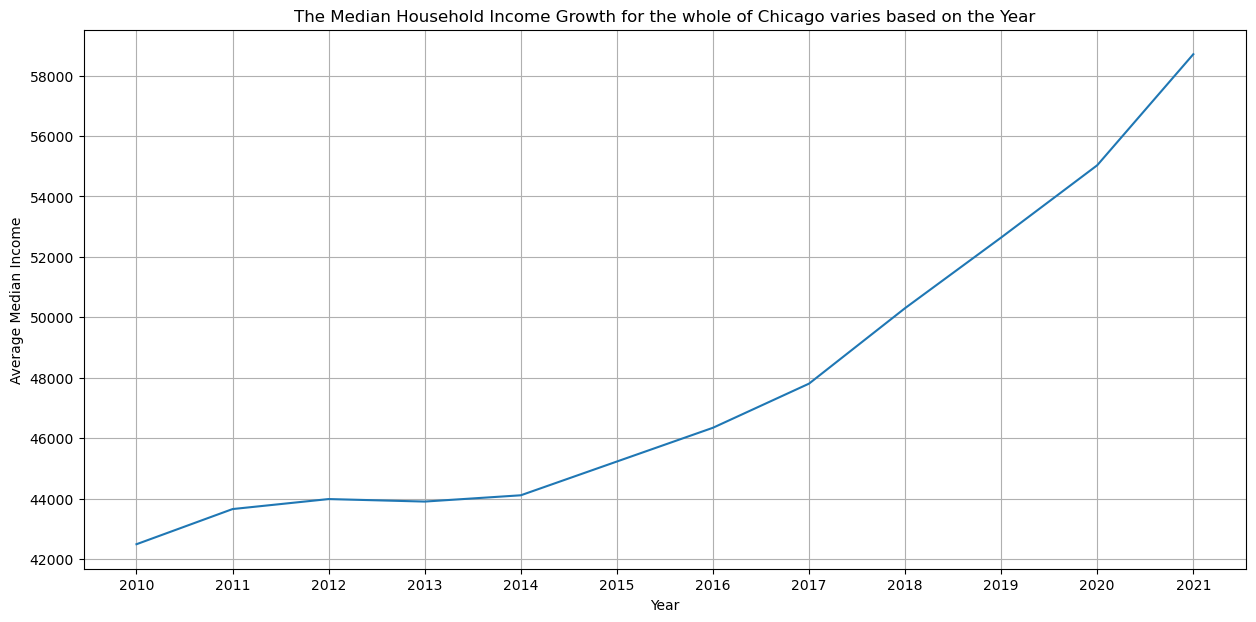

In [17]:
plt.figure(figsize=(15,7))

#[i[-4:]for i in df_Y.mean().index] - distinct years ordered
plt.plot([i[-4:]for i in df_Y.mean().index],df_Y.mean())

plt.title('The Median Household Income Growth for the whole of Chicago varies based on the Year')
plt.ylabel('Average Median Income')
plt.xlabel('Year')

plt.grid()
plt.show();
#df[y_col].mean()[::-1].plot(figsize=(10,10))
#sns.plt(data=df[y_col],x=df[y_col].index)

* The Median Household Income Growth for the whole of Chicago varies based on the Year
* Median Income per Block has to be Evaluated with Respect to the Average each year

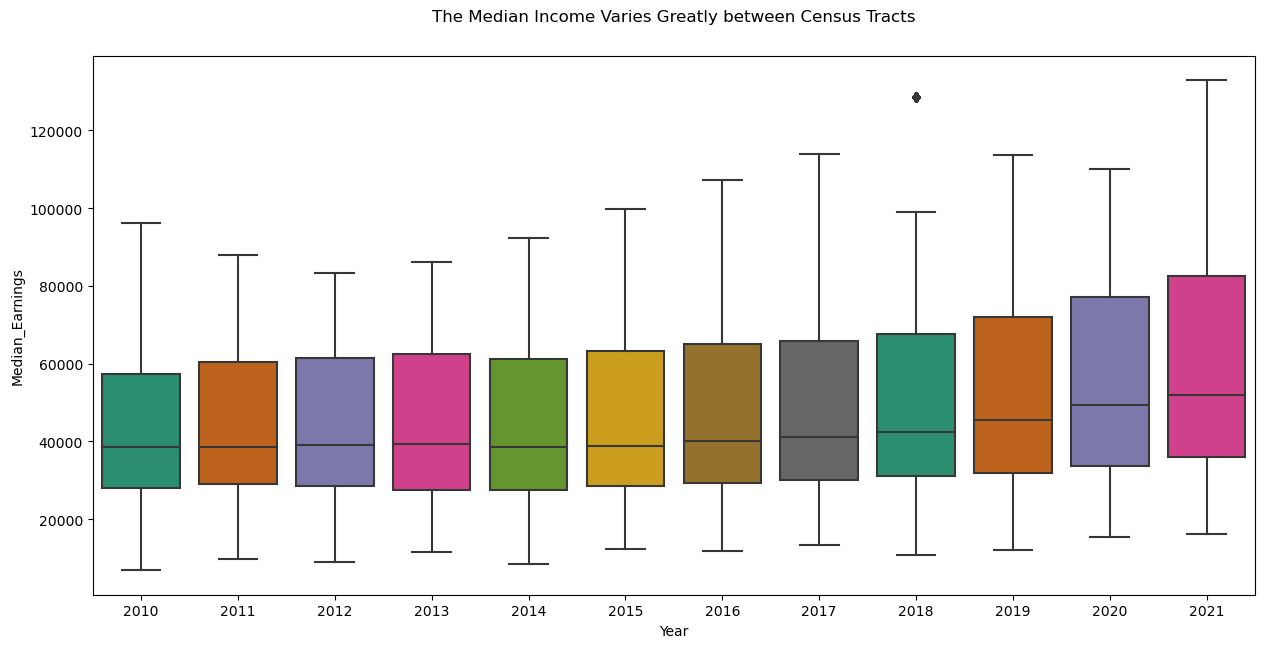

In [16]:
fig, ax = plt.subplots(figsize=(15,7))

sns.boxplot(data=df_Y, palette=sns.color_palette('Dark2'), ax=ax)

li=[(i[-4::]) for i in df_Y.columns]
ax.set_xticklabels(li)
ax.set_xlabel('Year')
ax.set_ylabel('Median_Earnings')
ax.set_title('The Median Income Varies Greatly between Census Tracts',pad=25);

In [133]:
df_Y=pd.concat([df_clean[y_col],df_clean['Census_Tract']],axis=1)
df_X=df_clean.drop(columns=y_col)

In [116]:
yearly_tract_income=df_Y.groupby('Census_Tract').mean()
yearly_tract_income=yearly_tract_income.reset_index().rename(columns={0:'Earnings'})
yearly_tract_income

,Census_Tract,Median_earnings_2021,Median_earnings_2020,Median_earnings_2019,Median_earnings_2018,Median_earnings_2017,Median_earnings_2016,Median_earnings_2015,Median_earnings_2014,Median_earnings_2013,Median_earnings_2012,Median_earnings_2011,Median_earnings_2010
785,843900,52599.0,49939.0,44485.0,48240.0,45377.0,33713.0,34166.5,34620.0,30651.0,38247.0,38897.0,40117.0
784,843800,27049.0,34479.0,25901.0,29063.0,35810.0,32450.0,26575.0,20700.0,21083.0,22311.0,35440.0,33526.0
783,843700,93906.0,93846.0,86324.0,80298.0,61199.0,61694.0,58021.5,54349.0,55714.0,60449.0,54149.0,49924.0
782,843600,44407.0,42800.0,41818.0,40801.0,41304.0,40378.0,37038.0,33698.0,31646.0,38547.0,29188.0,26898.0
781,843500,20820.0,18152.0,21936.0,23971.0,16783.0,16427.0,16550.5,16674.0,14176.0,8889.0,13137.0,15183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,10400,44372.0,42526.0,40333.0,40921.0,42088.0,40298.0,41331.0,42364.0,40688.0,38242.0,41913.0,39303.0
3,10300,46552.0,39812.0,38230.0,35818.0,34260.0,34483.0,35427.5,36372.0,34898.0,36772.0,40144.0,40259.0
2,10202,30365.0,31212.0,30104.0,30237.0,28791.0,30192.0,27703.0,25214.0,26417.0,27299.0,30408.0,30136.0
1,10201,36176.0,35750.0,33388.0,33517.0,31793.0,35058.0,32624.0,30190.0,28564.0,29688.0,29346.0,30931.0


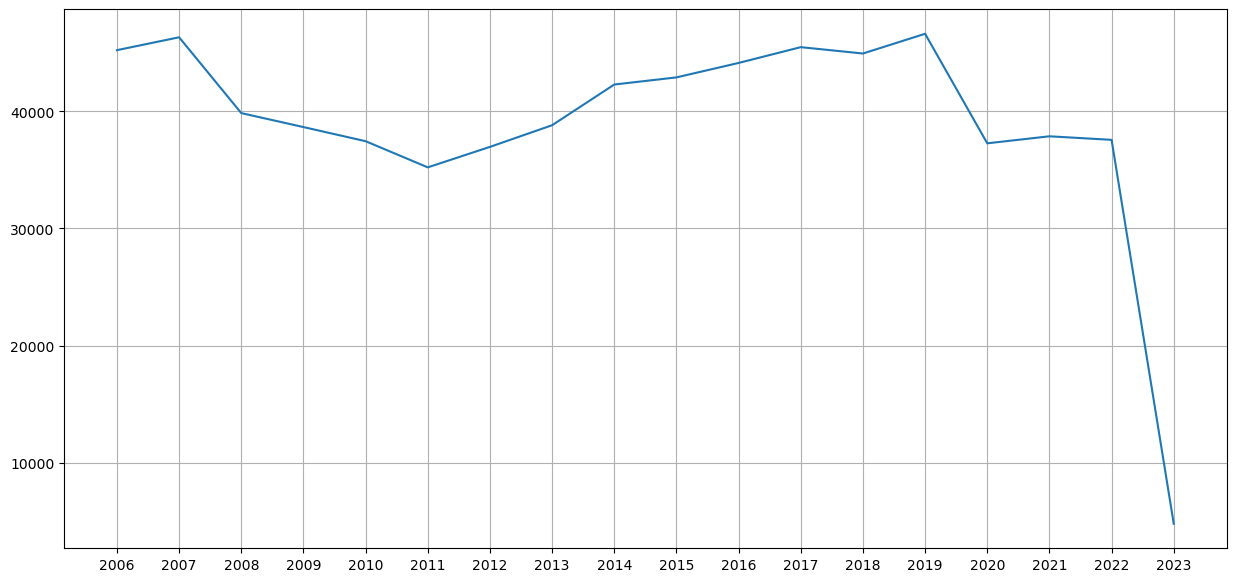

In [75]:
yearly_count=df_X.groupby(df_X.ISSUE_DATE.dt.year).size()

plt.figure(figsize=(15,7))
plt.plot(yearly_count.index,yearly_count.values)
plt.xticks(yearly_count.index)
plt.grid()
plt.show();

In [98]:
yearly_count_tract=df_X.groupby([df_X.ISSUE_DATE.dt.year,'Census_Tract']).size()
yearly_count_tract=yearly_count_tract.reset_index().rename(columns={0:'Count'})
yearly_count_tract

,ISSUE_DATE,Census_Tract,Count
0,2006,10100,45
1,2006,10201,55
2,2006,10202,31
3,2006,10300,47
4,2006,10400,81
...,...,...,...
13476,2023,843500,3
13477,2023,843600,8
13478,2023,843700,15
13479,2023,843800,4


---

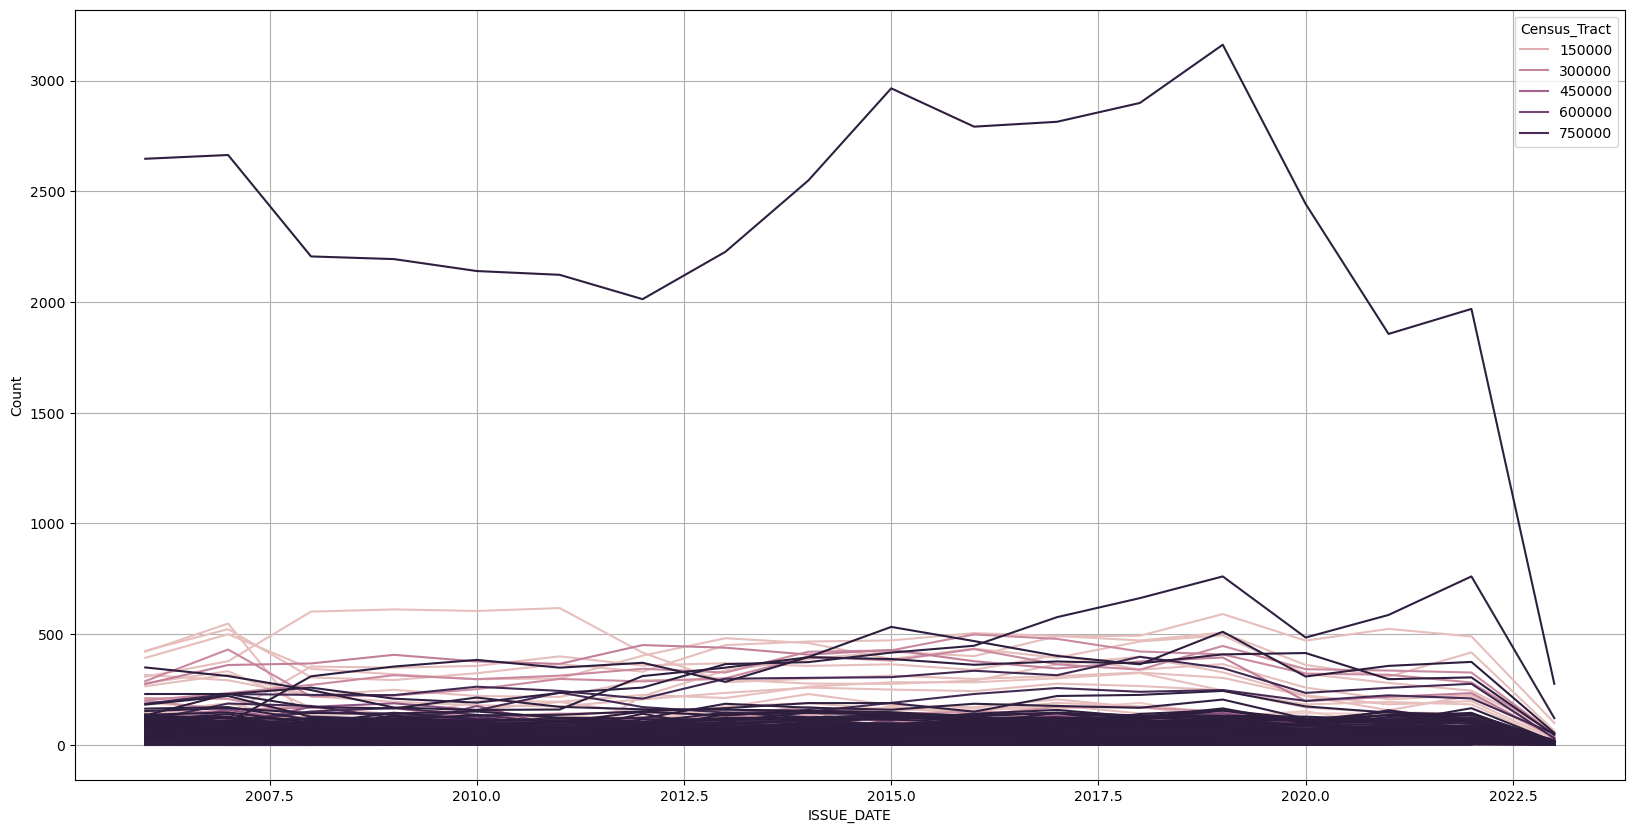

In [100]:
plt.figure(figsize=(20,10))
sns.lineplot(data=yearly_count_tract,x='ISSUE_DATE',y='Count',hue='Census_Tract')
#plt.xticks(yearly_count_tract.index)
plt.grid()
plt.show();

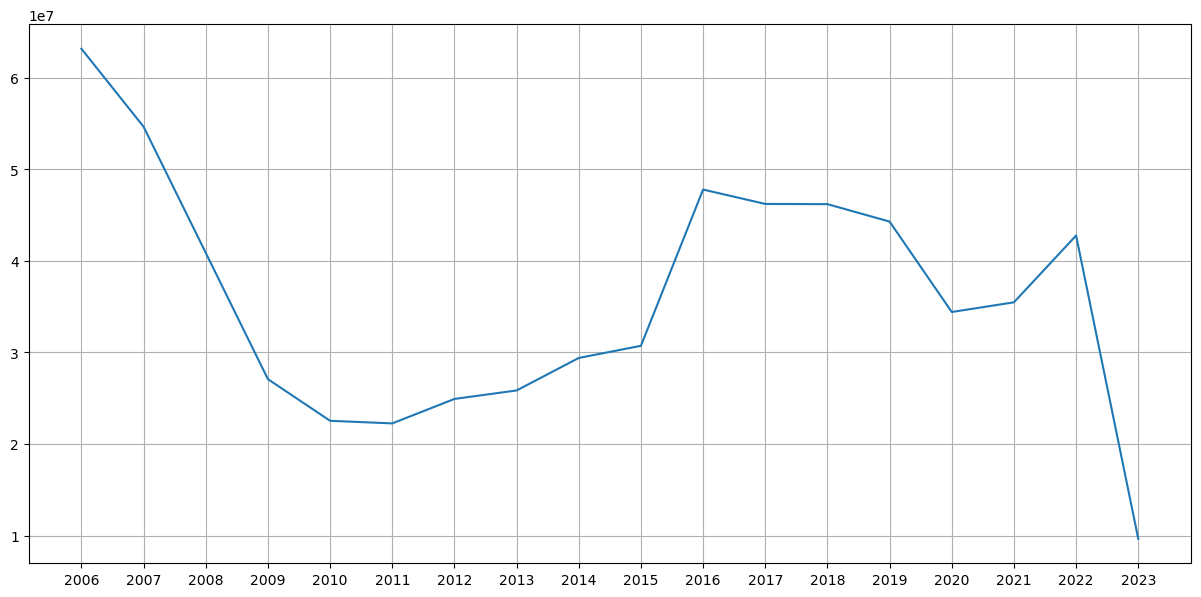

In [77]:
yearly_count_total_fee=df_X.groupby(df_X.ISSUE_DATE.dt.year)['TOTAL_FEE'].sum()

plt.figure(figsize=(15,7))
plt.plot(yearly_count_total_fee.index,yearly_count_total_fee.values)
plt.xticks(yearly_count.index)
plt.grid()
plt.show();

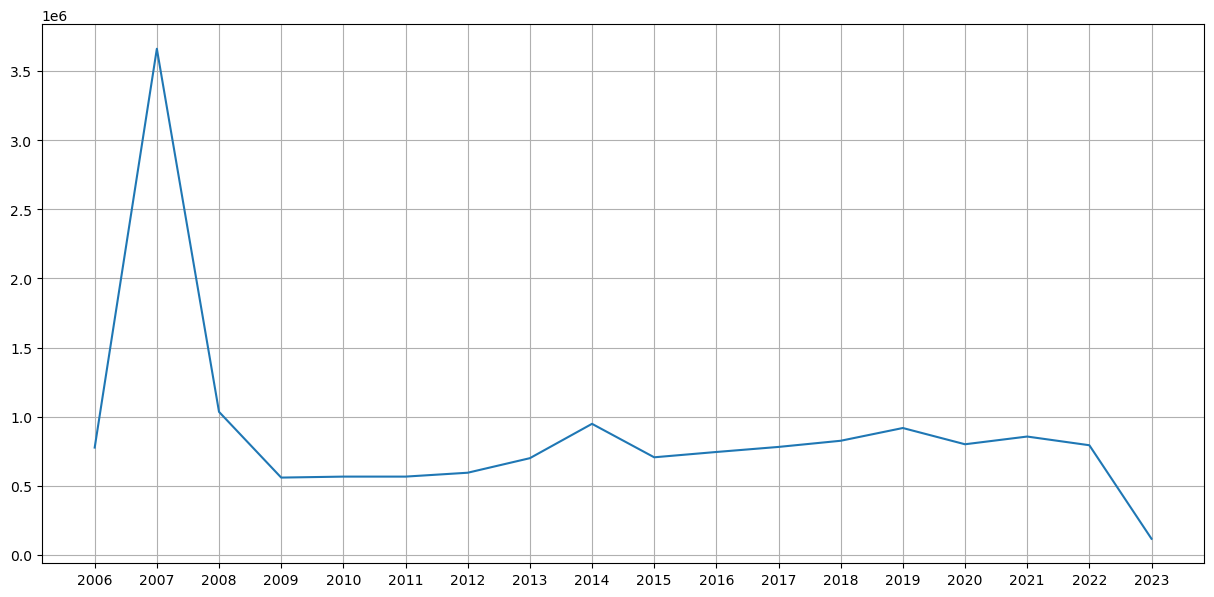

In [78]:
yearly_count_processing_time=df_X.groupby(df_X.ISSUE_DATE.dt.year)['PROCESSING_TIME'].sum()

plt.figure(figsize=(15,7))
plt.plot(yearly_count_processing_time.index,yearly_count_processing_time.values)
plt.xticks(yearly_count_processing_time.index)
plt.grid()
plt.show();

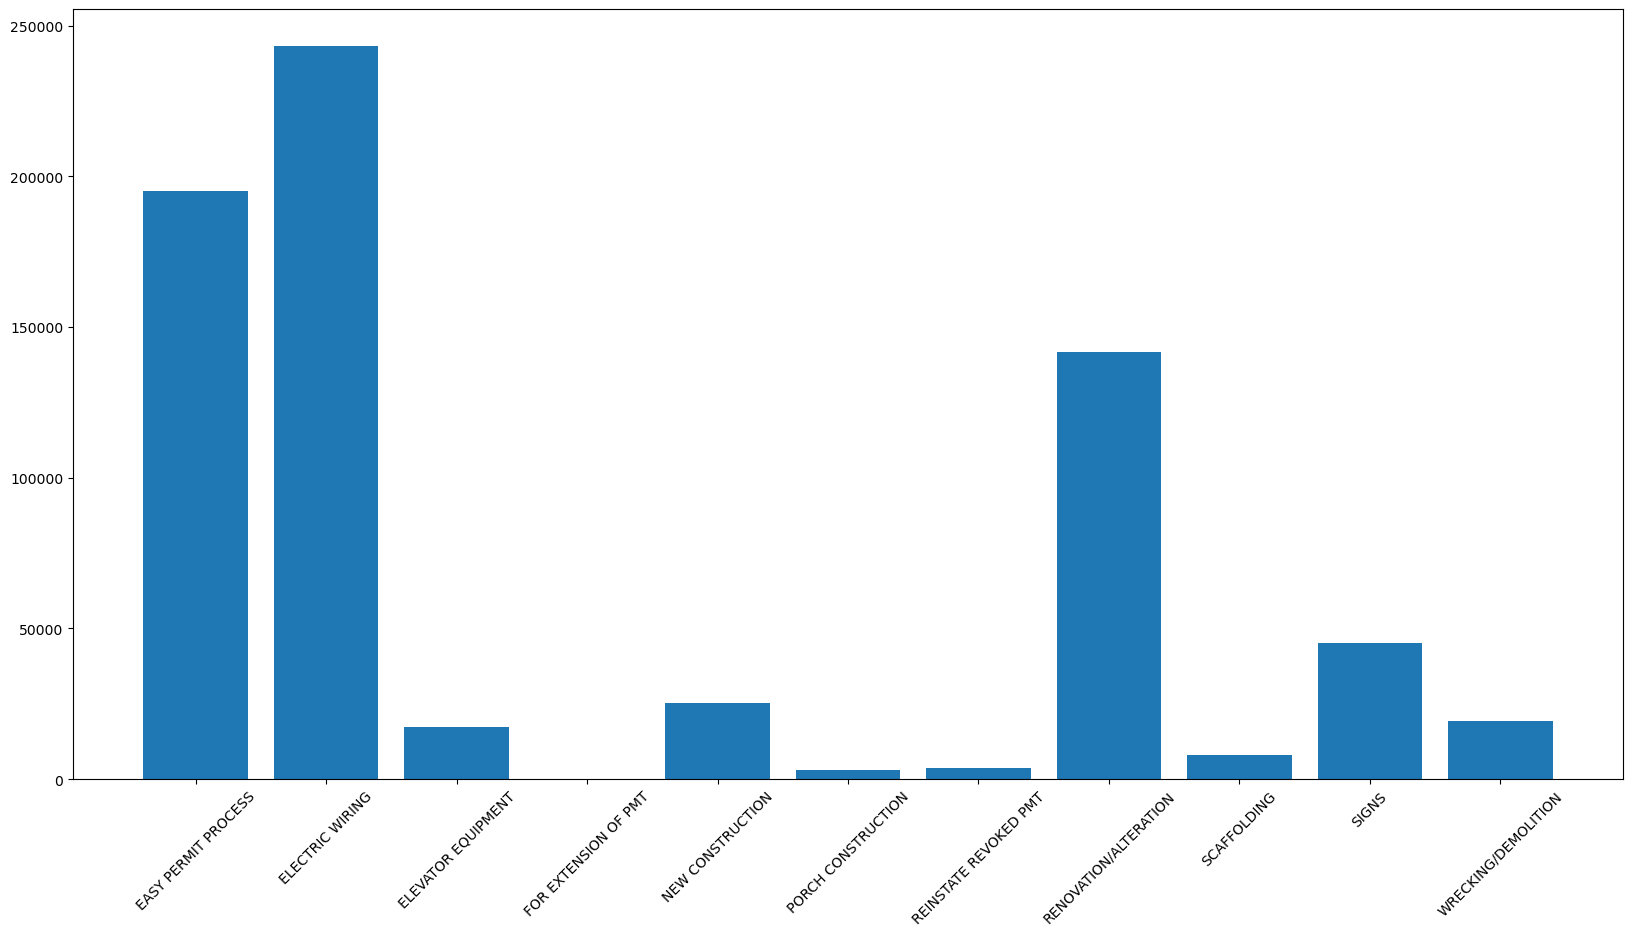

In [59]:
permit_types=df_X.groupby('PERMIT_TYPE').size()

plt.figure(figsize=(20,10))
plt.bar(permit_types.index,permit_types.values)
plt.xticks(rotation=45);

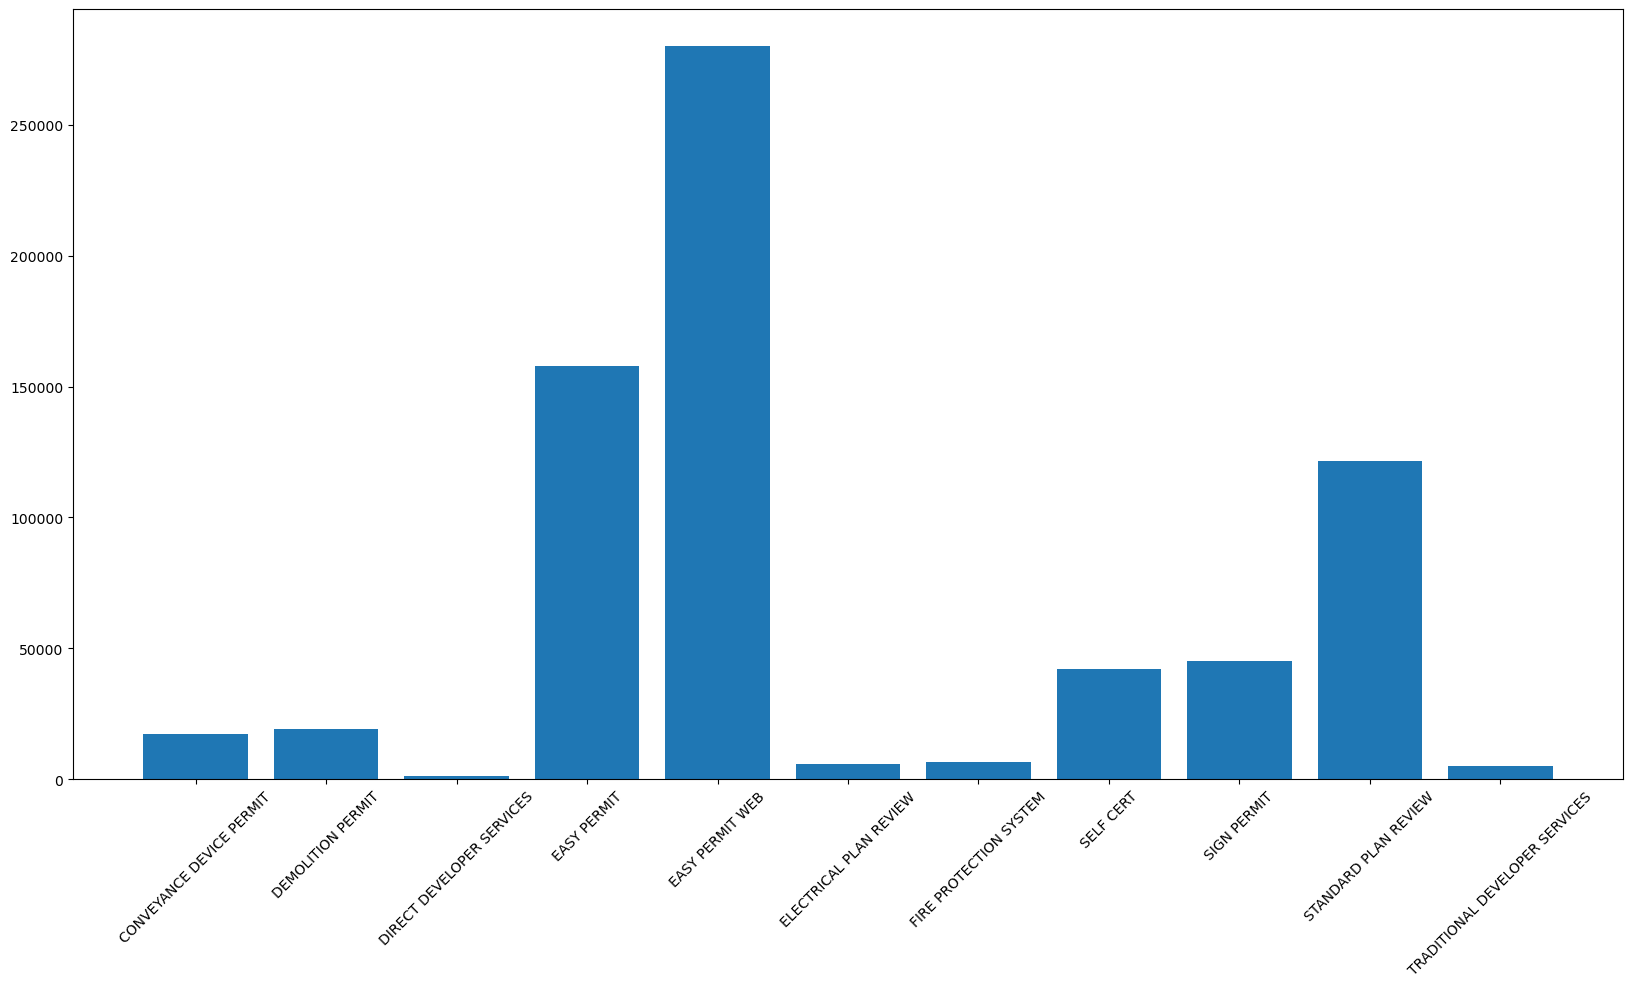

In [60]:
permit_types=df_X.groupby('REVIEW_TYPE').size()

plt.figure(figsize=(20,10))
plt.bar(permit_types.index,permit_types.values)
plt.xticks(rotation=45);

In [45]:
df_clean[y_col].isna().any(axis=1).sum()

0

In [49]:
df_X.columns

Index(['Census_Tract', 'ID', 'PERMIT_TYPE', 'REVIEW_TYPE', 'ISSUE_DATE',
       'PROCESSING_TIME', 'WORK_DESCRIPTION', 'BUILDING_FEE_PAID',
       'ZONING_FEE_PAID', 'OTHER_FEE_PAID', 'SUBTOTAL_PAID',
       'BUILDING_FEE_UNPAID', 'ZONING_FEE_UNPAID', 'OTHER_FEE_UNPAID',
       'SUBTOTAL_UNPAID', 'BUILDING_FEE_WAIVED', 'ZONING_FEE_WAIVED',
       'OTHER_FEE_WAIVED', 'SUBTOTAL_WAIVED', 'TOTAL_FEE', 'CONTACT_1_TYPE',
       'CONTACT_1_CITY', 'CONTACT_1_STATE', 'REPORTED_COST'],
      dtype='object')

**Export df_X and df_Y to csv** 

In [119]:
df_X.to_csv('../data/interim/df_X.csv')
df_Y.to_csv('../data/interim/df_Y.csv')

## Test Grouping by Census Tract

[ ] Need to convert all to numeric to perform numeric operations within groupby

In [117]:
df_X

,Census_Tract,ID,PERMIT_TYPE,REVIEW_TYPE,ISSUE_DATE,PROCESSING_TIME,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,...,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_CITY,CONTACT_1_STATE,REPORTED_COST
0,10100,1679252,EASY PERMIT PROCESS,EASY PERMIT,2006-05-11,0.000000,REBUILD PARAPET WALLS AS NEEDED AND REPLACE 12...,287.5,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,362.5,CONTRACTOR-GENERAL CONTRACTOR,CHICAGO,IL,22000.0
1,10100,1682962,ELECTRIC WIRING,EASY PERMIT WEB,2006-08-02,70.000000,200 amp over head service Add 2 20 amp circuit...,70.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,70.0,CONTRACTOR-ELECTRICAL,SKOKIE,IL,3200.0
2,10100,1684785,ELECTRIC WIRING,ELECTRICAL PLAN REVIEW,2006-05-31,0.000000,400 amp 5 meter service,140.0,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,640.0,CONTRACTOR-ELECTRICAL,SKOKIE,IL,0.0
3,10100,1690517,ELECTRIC WIRING,EASY PERMIT WEB,2006-08-30,21.677212,INSTALLATION OF A LOW VOLTAGE SECURITY ALARM S...,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.0,CONTRACTOR-ELECTRICAL,OAK BROOK,IL,414.0
4,10100,1696973,ELECTRIC WIRING,EASY PERMIT WEB,2006-09-11,62.000000,installation of a low voltage security alarm 3...,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.0,CONTRACTOR-ELECTRICAL,OAK BROOK,IL,415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708551,843900,2440731,ELECTRIC WIRING,EASY PERMIT WEB,2013-01-22,0.000000,EMERGENCY SERVICE TO INSPECT ELECTRICAL CIRCUI...,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,50.0,CONTRACTOR-ELECTRICAL,CHICAGO,IL,10000.0
708552,843900,3256791,SIGNS,SIGN PERMIT,2023-01-10,148.000000,PERMIT PROCESS FOR AWNING INSTALL OVER STOREFR...,200.0,200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,400.0,CONTRACTOR-GENERAL CONTRACTOR,OAK LAWN,IL,500.0
708553,843900,3302206,ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,2023-01-18,0.000000,Fire service upgrade to comply with 2017 Manda...,300.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,300.0,CONTRACTOR-ELEVATOR,WORTH,IL,14880.0
708554,843900,3306752,EASY PERMIT PROCESS,EASY PERMIT,2023-02-14,0.000000,LOBBY /MAILING ROOM REPAIRS: DRYWALL REPAIR/RE...,175.0,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,250.0,CONTRACTOR-GENERAL CONTRACTOR,CHICAGO,IL,16762.0
